In [382]:
## dataset
## https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [583]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Tensorflow sequential model
from tensorflow import keras
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

plt.rcParams['figure.figsize']=(15,12)

In [509]:
# diagnosis_le: m = 1 (malignant), b = 0 (benign)

In [510]:
# load data

data = pd.read_csv('data.csv')

In [511]:
# check for null values

data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [512]:
# initiate LabelEncoder to for dummy variable for 'diagnosis'

le = LabelEncoder()
data['diagnosis_le'] = le.fit_transform(data['diagnosis'])

In [513]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis_le
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [514]:
#drop columns

data.drop(['id','diagnosis','Unnamed: 32'], axis=1, inplace=True)

## Exploratory Data Analysis

In [515]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_le
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


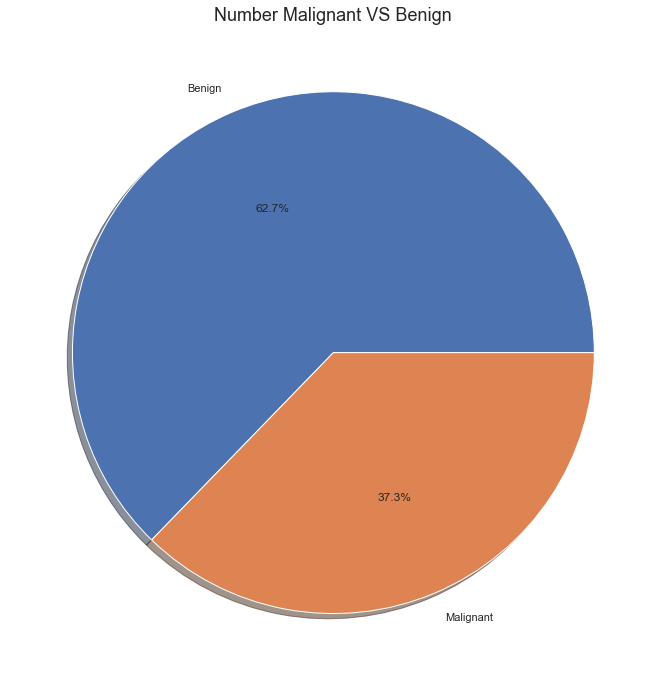

In [516]:
# plot a pie chart to show the numbers between those who are tested malignant and benign

plt.subplot(1,1,1)
labels = ['Benign','Malignant',]
plt.pie(data.diagnosis_le.value_counts(),labels=labels, autopct='%0.1f%%', shadow=True)
plt.title('Number Malignant VS Benign', fontsize=18);

## Ranking of correlation of 30 features linked to malignancy


In [517]:
# remove the first row of data.corr()

data_sorted = data.corr().sort_values('diagnosis_le',ascending=False)[1:]


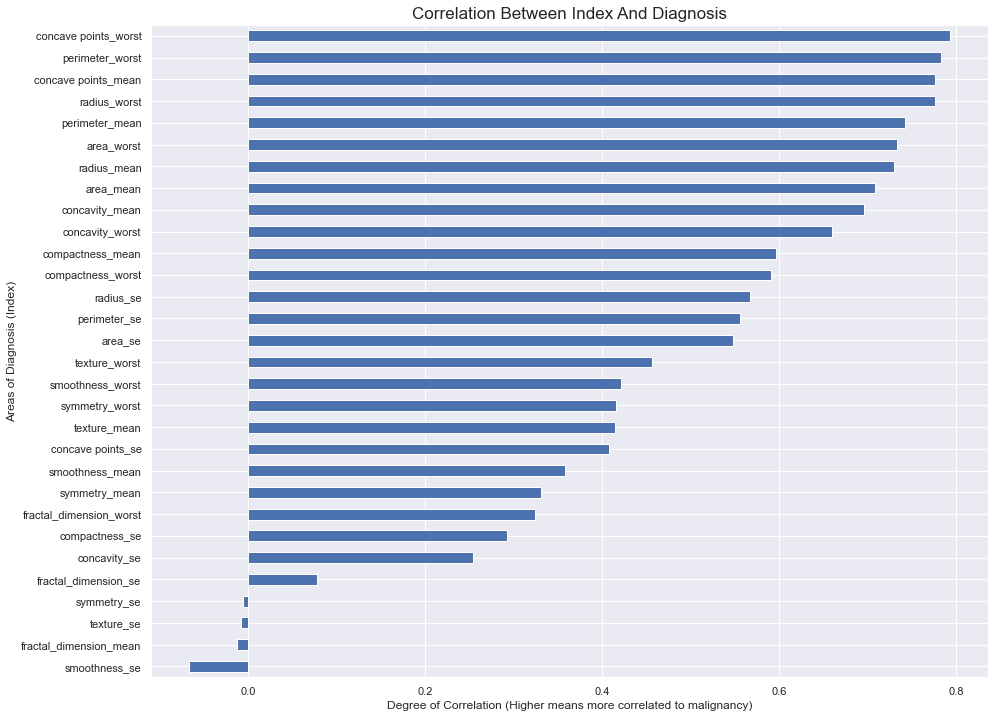

In [518]:
"""The purpose of the bar chart is to show areas which will affect diagnosis and sort them according to how much 
correlation there is. For example, 'concave point_worst' is the most positively correlated to a 
malignant diagnosis, and 'smoothness_se' is negatively correlated to a malignant diagnosis."""

# plot bar chart using data_sorted

data_sorted.reset_index().groupby('index')['diagnosis_le'].mean().sort_values().plot(kind='barh');
plt.title('Correlation Between Index And Diagnosis', fontsize=17);
plt.xlabel('Degree of Correlation (Higher means more correlated to malignancy)');
plt.ylabel('Areas of Diagnosis (Index)');

In [724]:
data.corr()['perimeter_mean']

radius_mean                0.997855
texture_mean               0.329533
perimeter_mean             1.000000
area_mean                  0.986507
smoothness_mean            0.207278
compactness_mean           0.556936
concavity_mean             0.716136
concave points_mean        0.850977
symmetry_mean              0.183027
fractal_dimension_mean    -0.261477
radius_se                  0.691765
texture_se                -0.086761
perimeter_se               0.693135
area_se                    0.744983
smoothness_se             -0.202694
compactness_se             0.250744
concavity_se               0.228082
concave points_se          0.407217
symmetry_se               -0.081629
fractal_dimension_se      -0.005523
radius_worst               0.969476
texture_worst              0.303038
perimeter_worst            0.970387
area_worst                 0.941550
smoothness_worst           0.150549
compactness_worst          0.455774
concavity_worst            0.563879
concave points_worst       0

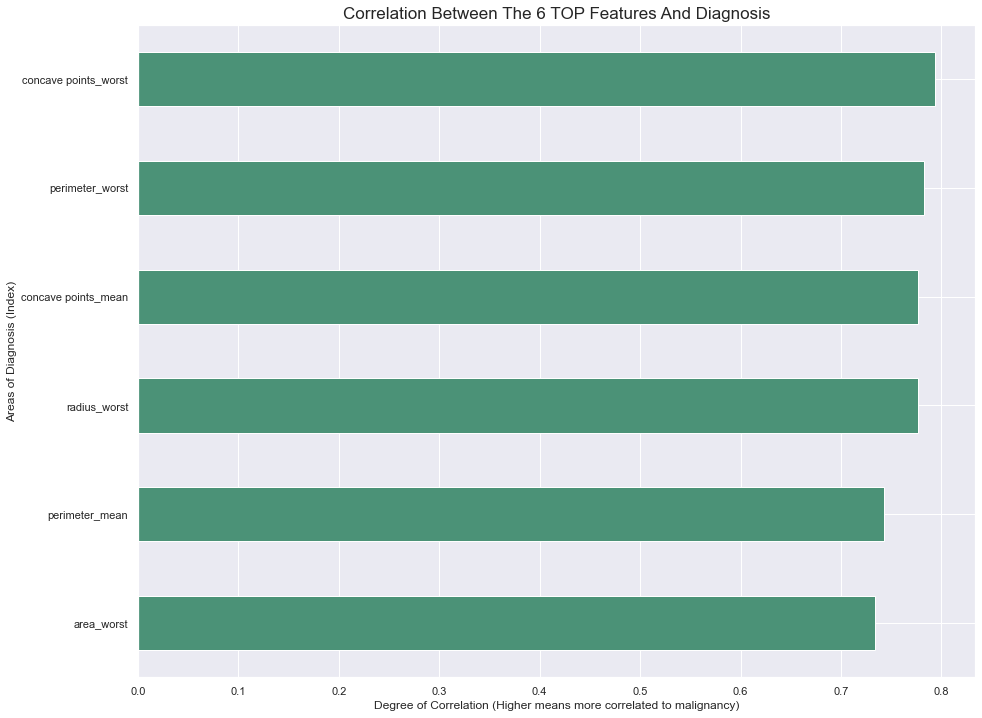

In [519]:
# Identify the TOP 6 features and plot a bar chart to see their correlation with malignancy

data_sorted_6 = data.corr().sort_values('diagnosis_le',ascending=False)[1:7]
data_sorted_6.reset_index().groupby('index')['diagnosis_le'].mean().sort_values().plot(kind='barh', color='#4B9277');
plt.title('Correlation Between The 6 TOP Features And Diagnosis', fontsize=17);
plt.xlabel('Degree of Correlation (Higher means more correlated to malignancy)');
plt.ylabel('Areas of Diagnosis (Index)');

## Deeper observations into the TOP 6 signs

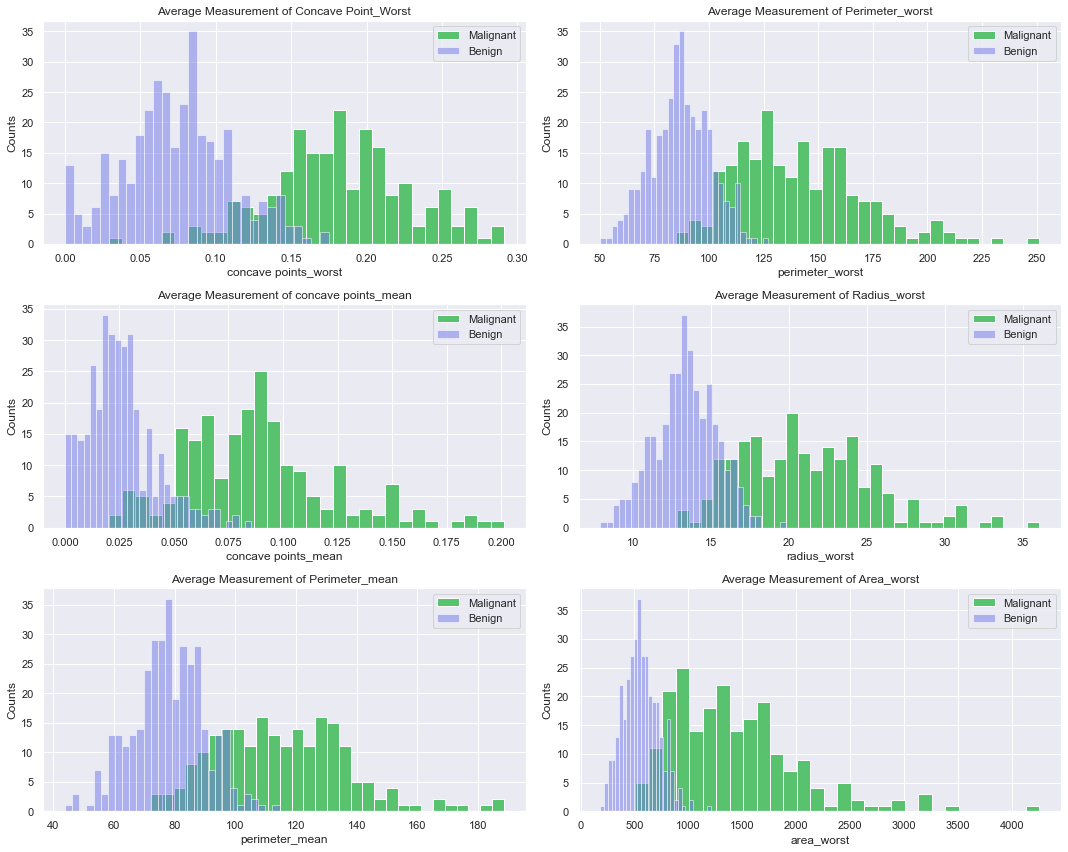

In [571]:
x=['concave points_worst','perimeter_worst','concave points_mean',\
             'radius_worst','perimeter_mean','area_worst']
y=['Average Measurement of Concave Point_Worst','Average Measurement of Perimeter_worst',\
  'Average Measurement of concave points_mean','Average Measurement of Radius_worst',\
  'Average Measurement of Perimeter_mean','Average Measurement of Area_worst']

j=1
for k, s in (zip(x,y)):
    plt.subplot(3,2,j)
    data.loc[data['diagnosis_le']==1, k].hist(bins=30, color='#59C26E');
    data.loc[data['diagnosis_le']==0, k].hist(bins=30,alpha=.5, color='#6F78E8');
    plt.xlabel(k);
    plt.ylabel('Counts');
    plt.title(s)
    plt.legend(['Malignant','Benign']);
    j+=1
        
plt.tight_layout()
plt.show()

In [521]:
# create a dataframe to summarize the mean of all 6 key features of observation
# diagnosis: 0 means benign, 1 means malignant

data_sorted_6_features = data.corr().sort_values('diagnosis_le',ascending=False).iloc[1:-1,:].index[0:6]

acc=[]
for i in data_sorted_6_features:
    k = data.groupby('diagnosis_le')[i].mean()
    acc.append(k)
df_6_features = pd.concat(acc, axis=1).reset_index()

df_6_features

,diagnosis_le,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst
0,0,0.074444,87.005938,0.025717,13.379801,78.075406,558.899440
1,1,0.182237,141.370330,0.087990,21.134811,115.365377,1422.286321


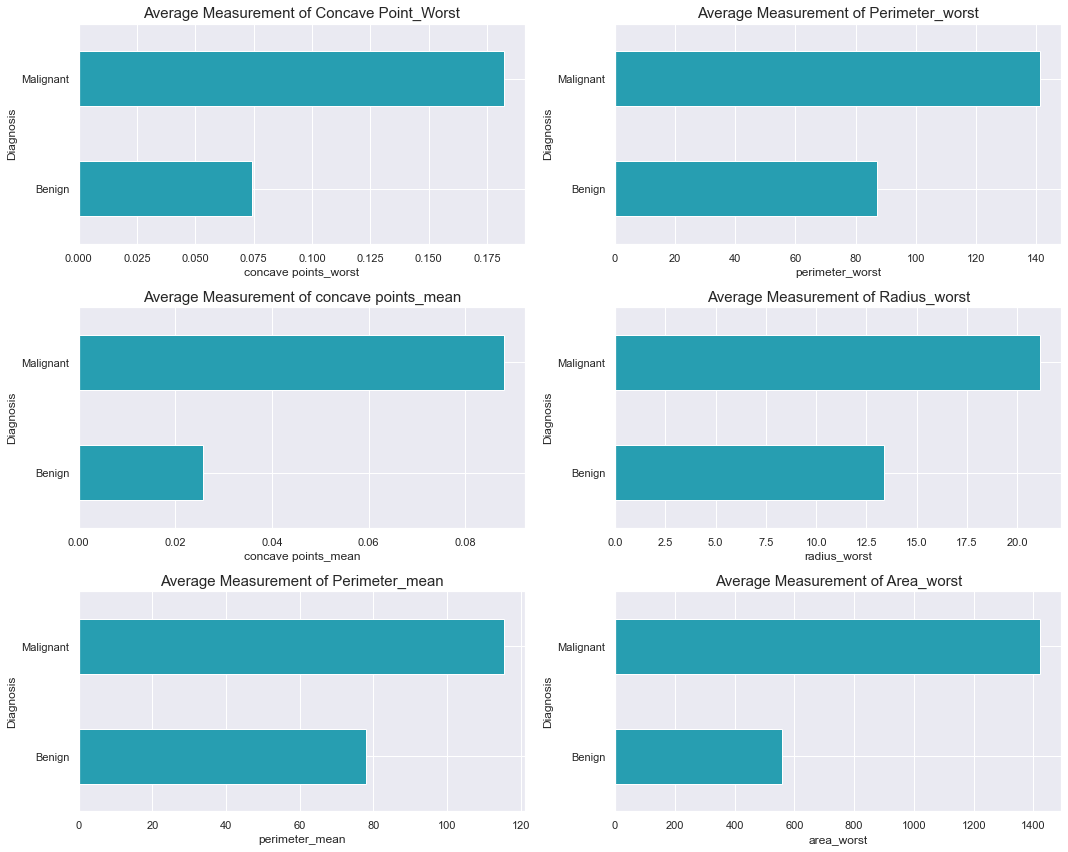

In [570]:
# create 6 plots to visualize the difference in the average measurements for these 6 features

x=['concave points_worst','perimeter_worst','concave points_mean',\
             'radius_worst','perimeter_mean','area_worst']
y=['Average Measurement of Concave Point_Worst','Average Measurement of Perimeter_worst',\
  'Average Measurement of concave points_mean','Average Measurement of Radius_worst',\
  'Average Measurement of Perimeter_mean','Average Measurement of Area_worst']

h =1
for t, q in (zip(x,y)):
    plt.subplot(3,2,h)
    data.groupby('diagnosis_le')[t].mean().plot(kind='barh', color='#279EB1')
    y = ['Benign','Malignant']
    y_pos = [i for i, _ in enumerate(y)]
    plt.yticks(y_pos, y)
    plt.xlabel(t)
    plt.ylabel('Diagnosis')
    plt.title(q, fontsize=15)
    h+=1
    
plt.tight_layout()
plt.show()

## Can we rely on these measurements  as indication of breast cancer?  
### We use the T Statistics to find out whether there are any significant differences in the mean values  between malignant and benign group of those being tested.  We will compute the T statistics of all 30 features derive the p values of the differences in the data.
### Null Hypothesis :  There is no significant difference between the means of those who are malignant and those who are benign in all the 30 features.
### Alternative Hypothesis: The measurements for malignant group are largers than that of the benign group.
### Alpha = 0.05

In [572]:
# Iterate through all the features and calculate differences in mean between malignant and benign to compute the p values.

all_features = data.corr().sort_values('diagnosis_le',ascending=False).iloc[1:].index[::]
p_total=[]
for j in all_features:
    acc=[]
    for k in data.diagnosis_le.unique():
        m = data.loc[data['diagnosis_le']==k,j]
        acc.append(m)
    t,p = stats.ttest_ind(acc[0],acc[1])
    p_total.append(p)
p_total

p_total_cols =list (zip(all_features,p_total))

pvalues = pd.DataFrame(p_total_cols, columns=['features','p_value'])
pvalues['Reject Ho?']=pvalues['p_value'].apply(lambda x: 'fail to reject Ho' if x >= 0.05 else 'reject Ho')

pvalues

,features,p_value,Reject Ho?
0,concave points_worst,1.969100e-124,reject Ho
1,perimeter_worst,5.771397e-119,reject Ho
2,concave points_mean,7.101150e-116,reject Ho
3,radius_worst,8.482292e-116,reject Ho
4,perimeter_mean,8.436251e-101,reject Ho
5,area_worst,2.828848e-97,reject Ho
6,radius_mean,8.465941e-96,reject Ho
7,area_mean,4.734564e-88,reject Ho
8,concavity_mean,9.966556e-84,reject Ho
9,concavity_worst,2.464664e-72,reject Ho


### Refering to the above mentioned dataframe, since 25 out of 30 features has p values < 0.05, we reject the null hypothesis for these 25 features.  This indicates that these measurements in the malignant group are significantly larger than that of the benign group.  
### However for the last 5 features, we fail to reject the null hypothesis, this means that these 5 features are not significantly larger than the benign group.
### We infer that for breast cancer, we are likely to see larger measurements for the first 25 features.  In other words 83%. 
### Therefore we conclude that malignancy of breast cancer is closely related to the larger measurements in these 25 features.

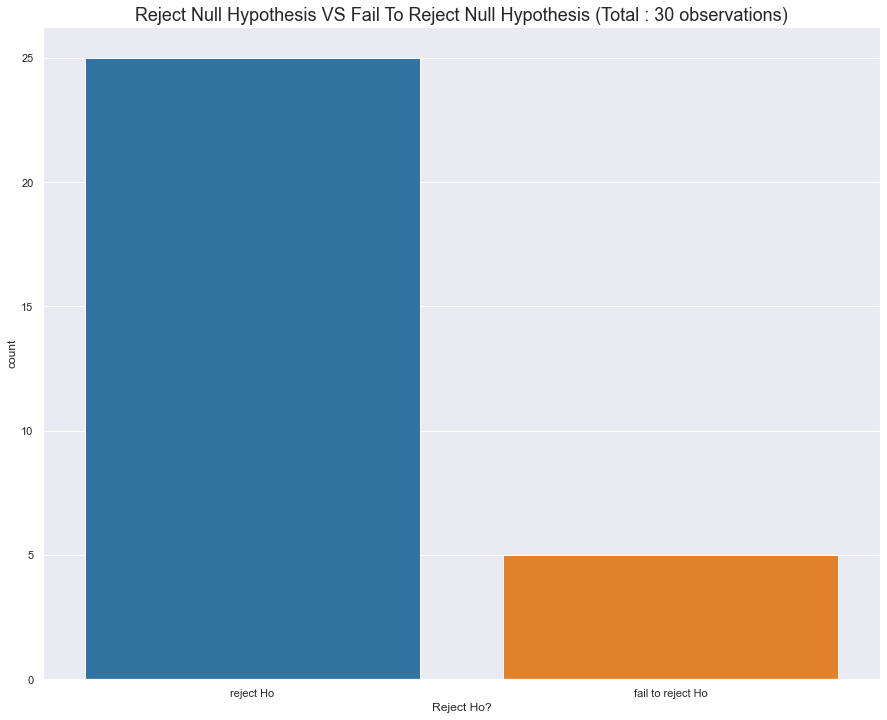

In [719]:
"""The purpose of this bar chart is to show that out of 30 features, 25 has shown to have measurements significantly 
larger than the benign group.  This has not occurred by mere chance or accident, but is associated with  
the breast cancer being malignant."""

# plot the bar chat to show number of features which are significantly larger than the benign group.

sns.countplot(data=pvalues, x='Reject Ho?', palette='tab10');
plt.title('Reject Null Hypothesis VS Fail To Reject Null Hypothesis (Total : 30 observations)', fontsize=18);

## Prediction by using some of the 25 features (whose differences are significant).
## Method 1: Use KMean clustering to seperate Benign from Malignant
## Method 2: Use non-linear prediction model (Tensorflow with Keras API)

### Method 1: KMeans

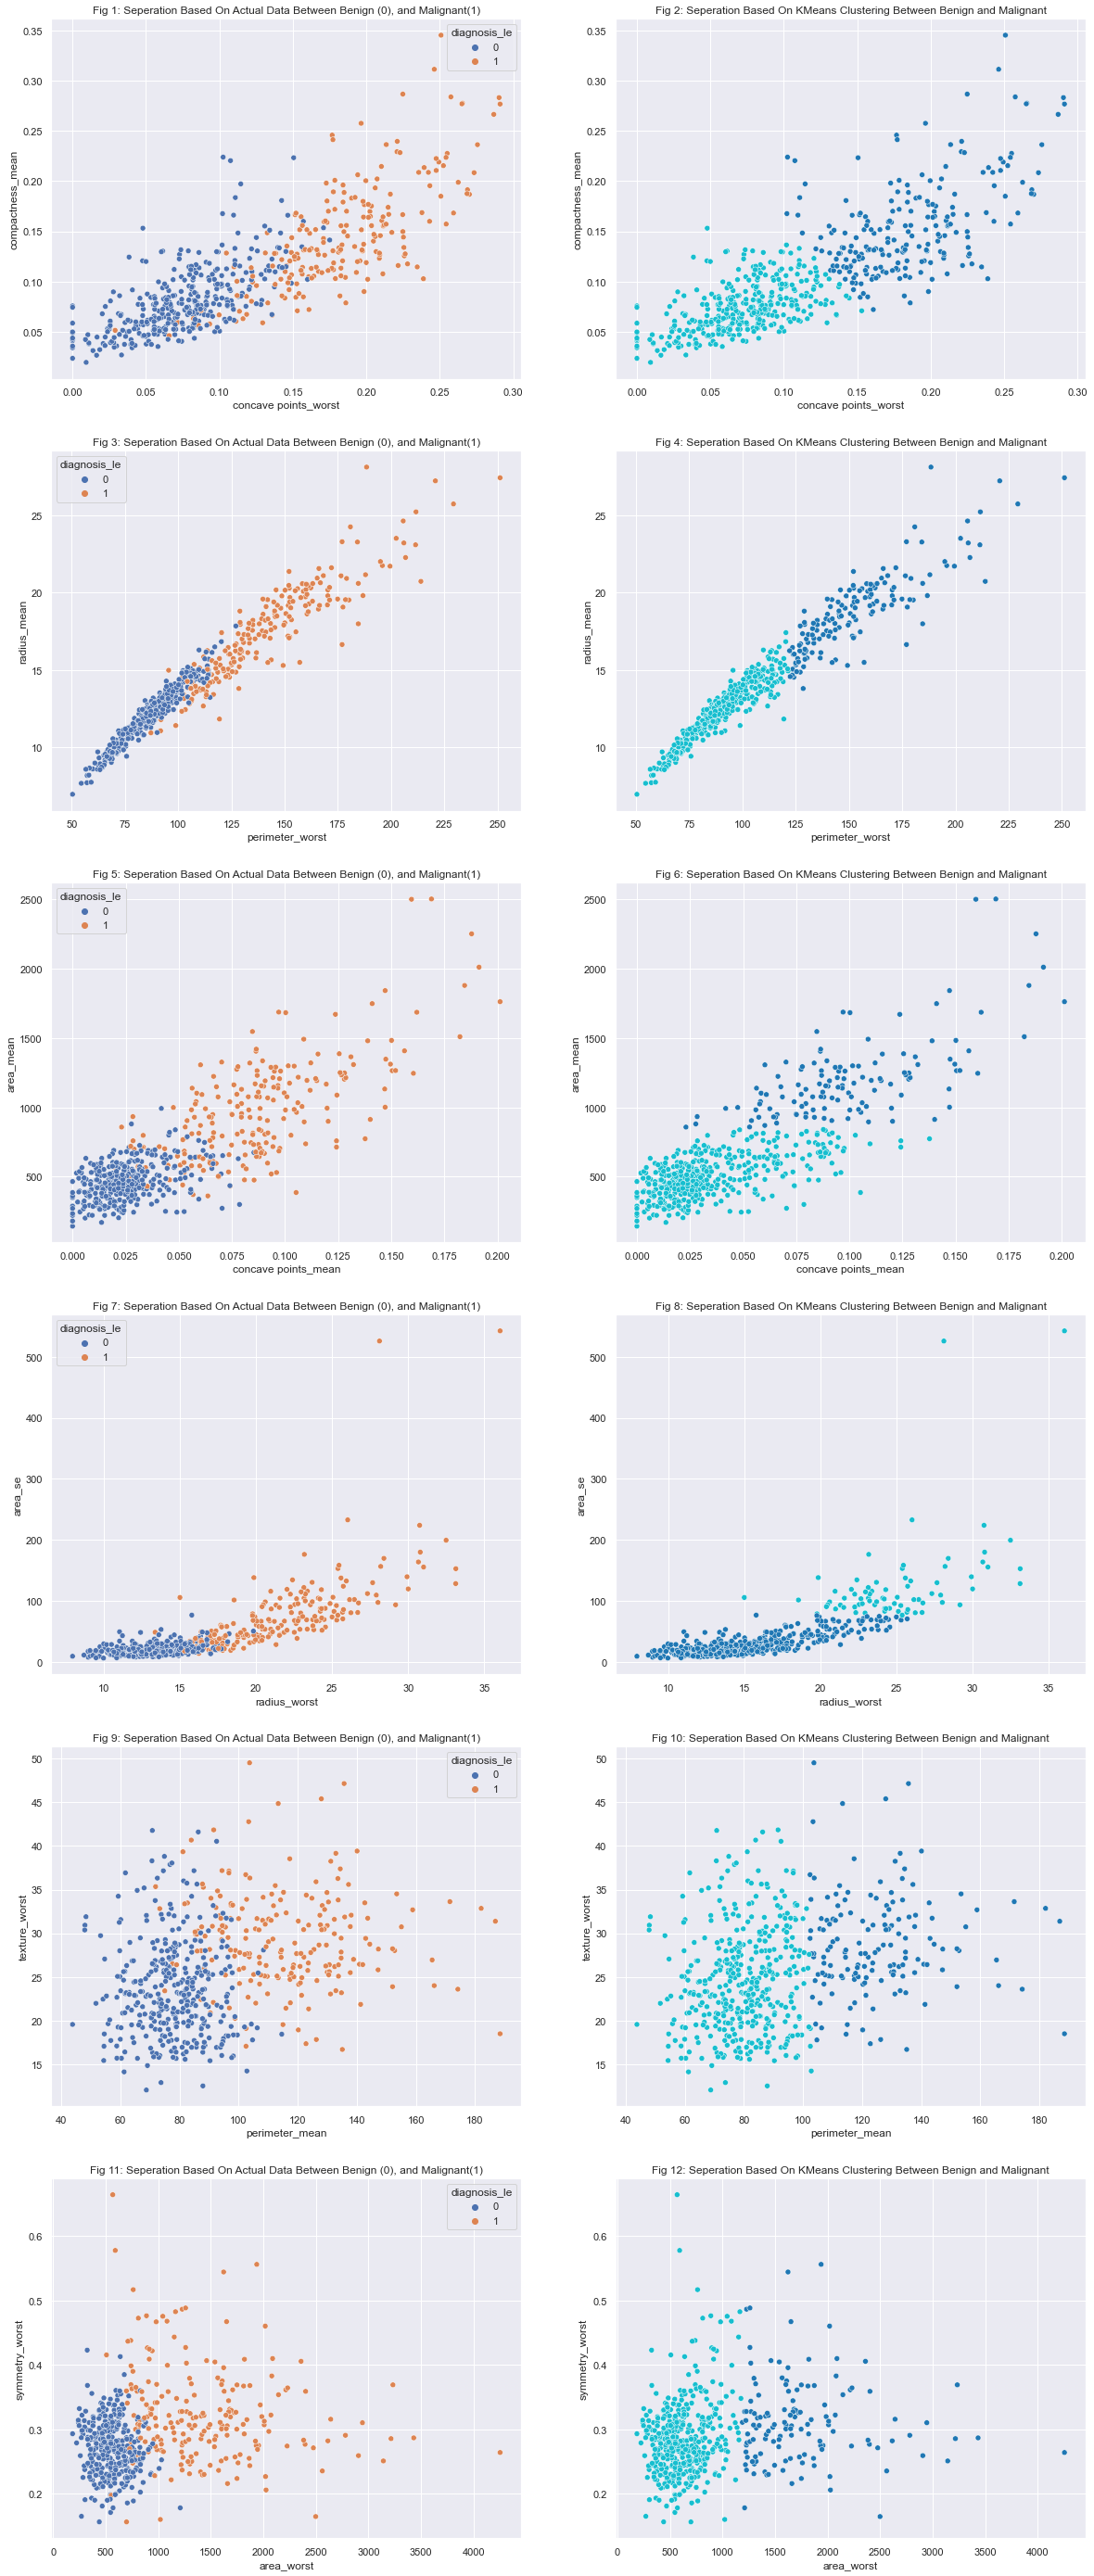

In [725]:
# plot the scatter plot 'compactness_mean' VS 'concave points_worst' showing benign or malignant with actual data
# 0 means benign, 1 means malignant

x = ['concave points_worst','perimeter_worst','concave points_mean','radius_worst','perimeter_mean','area_worst']

y = ['compactness_mean','radius_mean','area_mean','area_se','texture_worst','symmetry_worst']

fig=plt.gcf()
fig.set_size_inches(20,50)

h=1
for j, k in (zip(x,y)):
    plt.subplot(6,2,h)

    sns.scatterplot(data=data, x=j, y=k, hue='diagnosis_le');
    plt.title(f"Fig {h}: Seperation Based On Actual Data Between Benign (0), and Malignant(1)")
    h+=1
    plt.tight_layout

    
    plt.subplot(6,2,h)
    X = data.loc[:,[j,k]]
    y_kmean = KMeans(n_clusters=2, random_state=1).fit_predict(X)
    sns.scatterplot(data=X, x=j, y=k, c=y_kmean, cmap = 'tab10');
    plt.title(f"Fig {h}: Seperation Based On KMeans Clustering Between Benign and Malignant");
    h+=1

    plt.tight_layout


### As KMean algorithm separates the clusters (refer to figures on the right), the clustering follows very closely to the actual results (refer to figures on the left).  The rule here is if the tumor 'concav points_worst' < 0.10, then it would be benign (refer to fig 2).  And if 'perimeter_worst' is < 115 then it will be benign (fig 4).

### Method 2: Using Tenorflow with Keras with API to create a model to predict breast cancer

In [720]:
# define function to scale data using MinMaxScaler

def scale_data (X_train, X_test):
    scaler = MinMaxScaler()  # initiate MinMaxScaler
    X_train_sc = scaler.fit_transform(X_train)
    X_test_sc = scaler.fit_transform(X_test)
    
    return X_train_sc, X_test_sc

In [721]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_le
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [93]:
# divide into predictor values (X) and target values (y)

X = data.drop('diagnosis_le', axis=1)
y = data['diagnosis_le']

X_np = X.values
y_np = y.values

In [99]:
# create tensorflow network, input total no. of features, no. of layers, no. of units in each layer, learning rate, 
# activation function in hidden layer and output layer, optimization function, loss function and metrics.

def create_net(num_features,
              hidden_layers=3,
              hidden_layer_neurones=128,
              dropout=0.0,
              learning_rate=0.001):
    """Create TF neural network"""
    
    net = Sequential()
    
    #Adding hidden layers neurones thru a loop
    for i in range(hidden_layers):
        #Add layers
        net.add(Dense(
        hidden_layer_neurones,
        input_dim=num_features,
        activation='relu'))
        #Add dropout layer
        net.add(Dropout(dropout))
    
    #Add 1 activation output (malignant or benign)
    net.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    opt = Adam(learning_rate)
    
    net.compile(loss='binary_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])
    return net

In [103]:
model = create_net(30)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               3968      
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [110]:
# split the data into train and test sets, scale the data using MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.25, random_state=42)

X_train_sc, X_test_sc = scale_data(X_train, X_test)

X_train_sc[0]

array([0.2546158 , 0.11531958, 0.24164177, 0.14824509, 0.15274894,
       0.06133142, 0.0529522 , 0.0582008 , 0.09076348, 0.12320977,
       0.01510049, 0.02404526, 0.01686849, 0.01097875, 0.10259374,
       0.0841019 , 0.04171717, 0.11185831, 0.15506365, 0.04098089,
       0.18061545, 0.09381663, 0.16730212, 0.0876836 , 0.16973443,
       0.0959906 , 0.1234388 , 0.18439863, 0.14665878, 0.11961682])

In [115]:
# define function to compute accuracy for predictions using train set and test set

def compute_accuracy(model, X_train_sc, X_test_sc, y_train, y_test):
    
    probability = model.predict(X_train_sc)
    y_pred_train = probability >= 0.5
    y_pred_train = y_pred_train.flatten()
    accuracy_train = np.mean(y_pred_train == y_train)
    
    probability = model.predict(X_test_sc)
    y_pred_test = probability >= 0.5
    y_pred_test = y_pred_test.flatten()
    accuracy_test = np.mean(y_pred_test == y_test)
    
    print(f" Training accuracy {accuracy_train: 0.3f}")
    print(f" Test accuracy {accuracy_test: 0.3f}")

In [112]:
def plot_training(history_dict):
    acc_values = history_dict['accuracy']
    val_acc_values = history_dict['val_accuracy']
    epochs = range(1, len(acc_values)+1)
    
    plt.plot(epochs, acc_values, 'bo', label ='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label= 'Test acc')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [126]:
num_features = X_train_sc.shape[1]
model = create_net(num_features)

history = model.fit(X_train_sc,
                   y_train,
                   epochs=250,
                   batch_size=64,
                   validation_data=(X_test_sc, y_test),
                   verbose=1)

Epoch 1/250
7/7 [==============================] - 0s 20ms/step - loss: 0.6506 - accuracy: 0.7277 - val_loss: 0.5779 - val_accuracy: 0.8671
Epoch 2/250
7/7 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.8662 - val_loss: 0.4543 - val_accuracy: 0.8951
Epoch 3/250
7/7 [==============================] - 0s 3ms/step - loss: 0.4470 - accuracy: 0.8638 - val_loss: 0.3328 - val_accuracy: 0.9021
Epoch 4/250
7/7 [==============================] - 0s 3ms/step - loss: 0.3358 - accuracy: 0.8803 - val_loss: 0.2437 - val_accuracy: 0.9091
Epoch 5/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2608 - accuracy: 0.9038 - val_loss: 0.1920 - val_accuracy: 0.9231
Epoch 6/250
7/7 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9108 - val_loss: 0.1695 - val_accuracy: 0.9161
Epoch 7/250
7/7 [==============================] - 0s 3ms/step - loss: 0.1861 - accuracy: 0.9202 - val_loss: 0.1222 - val_accuracy: 0.9441
Epoch 8/250
7/7 [=========

7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 1.1119 - val_accuracy: 0.7902
Epoch 60/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0106 - accuracy: 0.9977 - val_loss: 0.7871 - val_accuracy: 0.8392
Epoch 61/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.9977 - val_loss: 0.8272 - val_accuracy: 0.8392
Epoch 62/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 1.2715 - val_accuracy: 0.7832
Epoch 63/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.7279 - val_accuracy: 0.8601
Epoch 64/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9930 - val_loss: 1.3794 - val_accuracy: 0.7692
Epoch 65/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9930 - val_loss: 1.4771 - val_accuracy: 0.7413
Epoch 66/250
7/7 [===============

7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.4612 - val_accuracy: 0.7902
Epoch 118/250
7/7 [==============================] - 0s 3ms/step - loss: 9.1665e-04 - accuracy: 1.0000 - val_loss: 1.5697 - val_accuracy: 0.7902
Epoch 119/250
7/7 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.4528 - val_accuracy: 0.7902
Epoch 120/250
7/7 [==============================] - 0s 4ms/step - loss: 9.9275e-04 - accuracy: 1.0000 - val_loss: 1.5208 - val_accuracy: 0.7902
Epoch 121/250
7/7 [==============================] - 0s 3ms/step - loss: 8.8144e-04 - accuracy: 1.0000 - val_loss: 1.5044 - val_accuracy: 0.7902
Epoch 122/250
7/7 [==============================] - 0s 3ms/step - loss: 8.1213e-04 - accuracy: 1.0000 - val_loss: 1.5511 - val_accuracy: 0.7902
Epoch 123/250
7/7 [==============================] - 0s 3ms/step - loss: 8.1044e-04 - accuracy: 1.0000 - val_loss: 1.5006 - val_accuracy: 0.7902
Epoch 1

7/7 [==============================] - 0s 3ms/step - loss: 3.1392e-04 - accuracy: 1.0000 - val_loss: 1.6992 - val_accuracy: 0.7902
Epoch 174/250
7/7 [==============================] - 0s 3ms/step - loss: 2.9857e-04 - accuracy: 1.0000 - val_loss: 1.7605 - val_accuracy: 0.7902
Epoch 175/250
7/7 [==============================] - 0s 3ms/step - loss: 3.0750e-04 - accuracy: 1.0000 - val_loss: 1.7196 - val_accuracy: 0.7902
Epoch 176/250
7/7 [==============================] - 0s 3ms/step - loss: 2.9571e-04 - accuracy: 1.0000 - val_loss: 1.7071 - val_accuracy: 0.7902
Epoch 177/250
7/7 [==============================] - 0s 3ms/step - loss: 2.9279e-04 - accuracy: 1.0000 - val_loss: 1.7360 - val_accuracy: 0.7902
Epoch 178/250
7/7 [==============================] - 0s 3ms/step - loss: 2.8380e-04 - accuracy: 1.0000 - val_loss: 1.7342 - val_accuracy: 0.7902
Epoch 179/250
7/7 [==============================] - 0s 3ms/step - loss: 2.8466e-04 - accuracy: 1.0000 - val_loss: 1.7254 - val_accuracy: 0.7902

7/7 [==============================] - 0s 3ms/step - loss: 1.4673e-04 - accuracy: 1.0000 - val_loss: 1.8601 - val_accuracy: 0.7902
Epoch 230/250
7/7 [==============================] - 0s 3ms/step - loss: 1.4485e-04 - accuracy: 1.0000 - val_loss: 1.9058 - val_accuracy: 0.7762
Epoch 231/250
7/7 [==============================] - 0s 3ms/step - loss: 1.4071e-04 - accuracy: 1.0000 - val_loss: 1.8732 - val_accuracy: 0.7902
Epoch 232/250
7/7 [==============================] - 0s 3ms/step - loss: 1.3714e-04 - accuracy: 1.0000 - val_loss: 1.8757 - val_accuracy: 0.7902
Epoch 233/250
7/7 [==============================] - 0s 3ms/step - loss: 1.3610e-04 - accuracy: 1.0000 - val_loss: 1.8975 - val_accuracy: 0.7832
Epoch 234/250
7/7 [==============================] - 0s 3ms/step - loss: 1.3548e-04 - accuracy: 1.0000 - val_loss: 1.9059 - val_accuracy: 0.7832
Epoch 235/250
7/7 [==============================] - 0s 3ms/step - loss: 1.3549e-04 - accuracy: 1.0000 - val_loss: 1.9139 - val_accuracy: 0.7762

In [128]:
compute_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

 Training accuracy  1.000
 Test accuracy  0.790


In [124]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

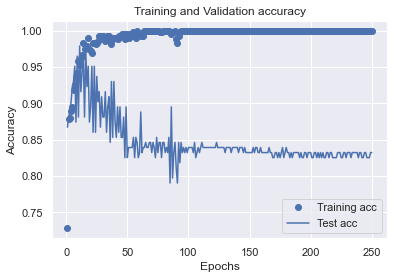

In [127]:
plot_training(history_dict)

In [132]:
model = create_net(num_features,
                  hidden_layers=1,
                  hidden_layer_neurones=16)

history = model.fit(X_train_sc,
                   y_train,
                   epochs=250,
                   batch_size=64,
                   validation_data=(X_test_sc, y_test),
                   verbose=0)

In [133]:
compute_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

 Training accuracy  0.981
 Test accuracy  0.923


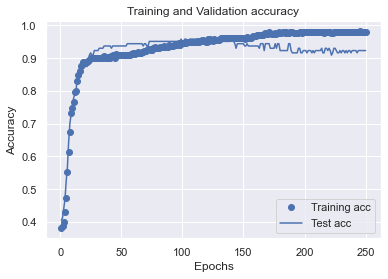

In [134]:
plot_training(history.history)

In [145]:
model = create_net(num_features,
                  hidden_layers=1,
                  hidden_layer_neurones=16,
                  dropout=0)

history = model.fit(X_train_sc,
                   y_train,
                   epochs=25,
                   batch_size=64,
                   validation_data=(X_test_sc, y_test),
                   verbose=0)

In [146]:
compute_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

 Training accuracy  0.906
 Test accuracy  0.923


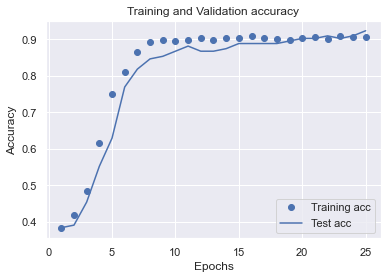

In [147]:
plot_training(history.history)

In [148]:
# Define save checkpoint callback (only retains new best validation results)

checkpoint_cb = keras.callbacks.ModelCheckpoint('model_checkpoint.h5'
                                               , save_best_only = True)

# Define early stopping
# Stop when there is no improvement for n epochs
# Then restore to previous best validation after 25 tries

early_stop_cb = keras.callbacks.EarlyStopping(
patience=25, restore_best_weights=True)

# Define network params
model = create_net(num_features,
                  hidden_layers=1,
                  hidden_layer_neurones=16,
                  dropout=0)

# Train model and store information into history in keras
history = model.fit(X_train_sc,
                   y_train,
                   epochs=25,
                   batch_size=64,
                   validation_data=(X_test_sc, y_test),
                   verbose=0,
                   callbacks = [checkpoint_cb, early_stop_cb])

In [149]:
compute_accuracy(model, X_train_sc, X_test_sc, y_train, y_test)

 Training accuracy  0.892
 Test accuracy  0.916


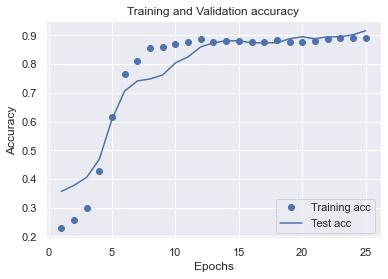

In [150]:
plot_training(history.history)

In [151]:
# save the model

model.save('breast_cancer.t1')

#Load and save the model
saved_model = keras.models.load_model('breast_cancer.t1')

prob_of_predicts = saved_model.predict(X_test_sc)

INFO:tensorflow:Assets written to: breast_cancer.t1\assets


In [188]:
print(prob_of_predicts[5].flatten())

[0.9526962]


In [153]:
compute_accuracy(saved_model, X_train_sc, X_test_sc, y_train, y_test)

 Training accuracy  0.892
 Test accuracy  0.916


## Model is trained!